## Exercises
Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

Age	Wing Length
3	1.4
4	1.5
5	2.2
6	2.4
7	3.1
8	3.2
9	3.2
11	3.9
12	4.1
14	4.7
15	4.5
16	5.2
17	5.0

1. Plot the relationship between Age and Wing Length.
2. Calculate and plot the regression line.
3. Can you reject H0: b=0
4. Calculate and plot the confidence intervals on the slope of the regression.
5. Calculate r^2 (the coefficient of determination)
6. Calculate Pearson's r
7. Add some noise to the data and see how the regression changes

1. Plot the relationship between Age and Wing Length

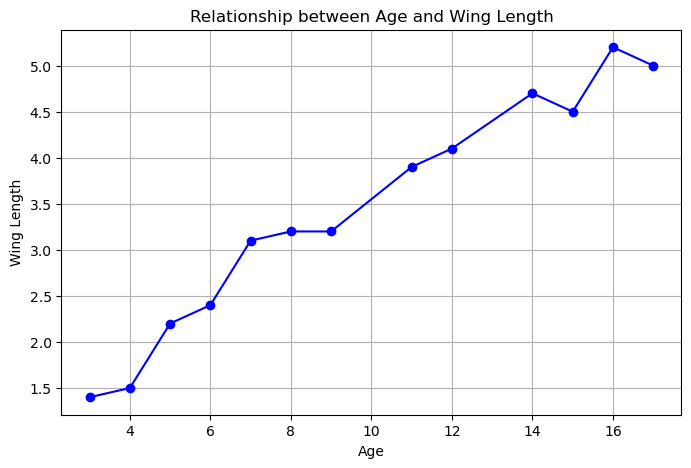

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Plot the relationship between Age and Wing Length

age = [3,4,5,6,7,8,9,11,12,14,15,16,17]
wing_length = [1.4, 1.5,2.2,2.4,3.1,3.2,3.2,3.9,4.1,4.7,4.5,5.2,5.0]

# Plotting
plt.figure(figsize=(8,5))
plt.plot(age, wing_length, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Relationship between Age and Wing Length')

# Show plot
plt.grid(True)
plt.show()

2. Calculate and plot the regression line

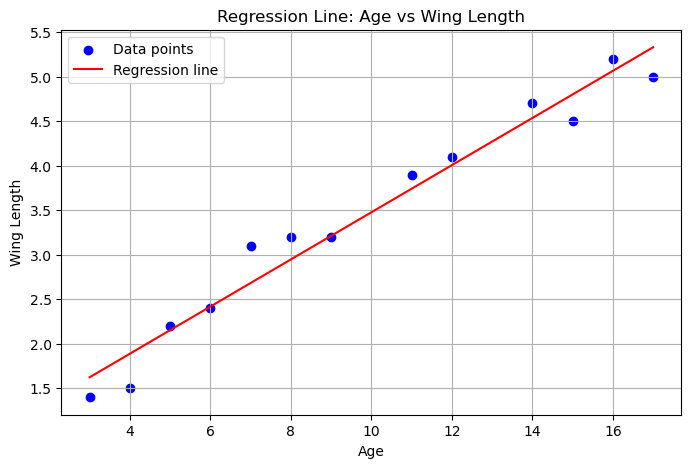

Slope: 0.26
Intercept: 0.83


In [8]:
# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]).reshape(-1, 1)
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Create a linear regression model
model = LinearRegression()
model.fit(age, wing_length)

# Predict wing lengths using the regression model
predicted_wing_length = model.predict(age)

# Plot original data points
plt.figure(figsize=(8,5))
plt.scatter(age, wing_length, color='blue', label='Data points')

# Plot regression line
plt.plot(age, predicted_wing_length, color='red', label='Regression line')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Regression Line: Age vs Wing Length')

# Show legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print slope and intercept of the regression line
print(f"Slope: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

3. Can you reject H0: b=0

In [10]:
import statsmodels.api as sm

# Add constant for intercept
age_with_const = sm.add_constant(age)

# Create the regression model
model = sm.OLS(wing_length, age_with_const)
results = model.fit()

# Summary of the regression analysis
print(results.summary())
print("3. We can reject the null hypothesis that b=0 (no relationship between age and wing length) because the p-value is less than 0.05")
print("5. The R-squared value is 0.963 (the adjusted R-squared value is 0.96)")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           3.01e-09
Time:                        01:20:37   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

/Users/diane1/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


4. Calculate and plot the confidence intervals on the slope of the regression

Slope: 0.26
Confidence Interval for slope: 0.23 to 0.30


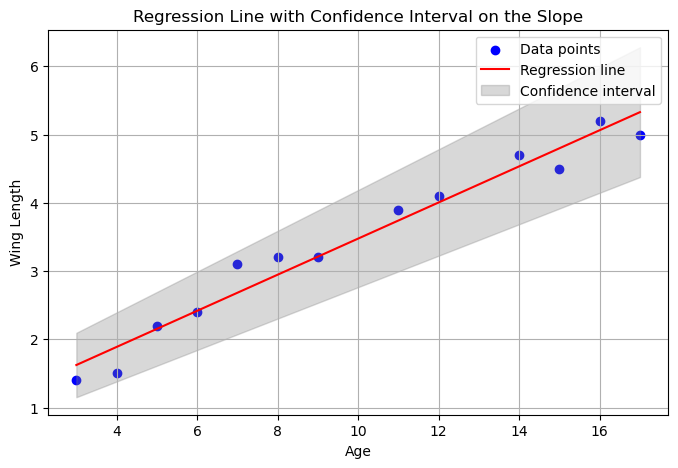

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add constant for intercept
age_with_const = sm.add_constant(age)

# Create the regression model
model = sm.OLS(wing_length, age_with_const)
results = model.fit()

# Extract slope, intercept, and confidence intervals
slope = results.params[1]
intercept = results.params[0]
conf_int = results.conf_int()

# Print slope and its confidence interval
print(f"Slope: {slope:.2f}")
print(f"Confidence Interval for slope: {conf_int[1][0]:.2f} to {conf_int[1][1]:.2f}")

# Generate regression line
predicted_wing_length = results.predict(age_with_const)

# Plot original data points and regression line
plt.figure(figsize=(8, 5))
plt.scatter(age, wing_length, color='blue', label='Data points')
plt.plot(age, predicted_wing_length, color='red', label='Regression line')

# Create confidence interval bounds for the slope (upper and lower bounds)
age_range = np.linspace(age.min(), age.max(), 100)
age_range_with_const = sm.add_constant(age_range)
predicted_wing_length_upper = (conf_int[0][1] + conf_int[1][1] * age_range)
predicted_wing_length_lower = (conf_int[0][0] + conf_int[1][0] * age_range)

# Plot confidence intervals
plt.fill_between(age_range, predicted_wing_length_lower, predicted_wing_length_upper, color='gray', alpha=0.3, label='Confidence interval')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Regression Line with Confidence Interval on the Slope')

# Show legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

5. Calculate r^2 (the coefficient of determination) and
6. Calculate Pearson's r

In [13]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# Calculate R^2 (coefficient of determination)
r_squared = r2_score(wing_length, predicted_wing_length)

# Calculate Pearson's r
pearson_r, p_value = pearsonr(age, wing_length)

# Print R^2 and Pearson's r
print(f"R^2 (Coefficient of Determination): {r_squared:.2f}")
print(f"Pearson's r: {pearson_r:.2f}")

R^2 (Coefficient of Determination): 0.96
Pearson's r: 0.98
P-value for Pearson's r: 0.00000


7. Add some noise to the data and see how the regression changes

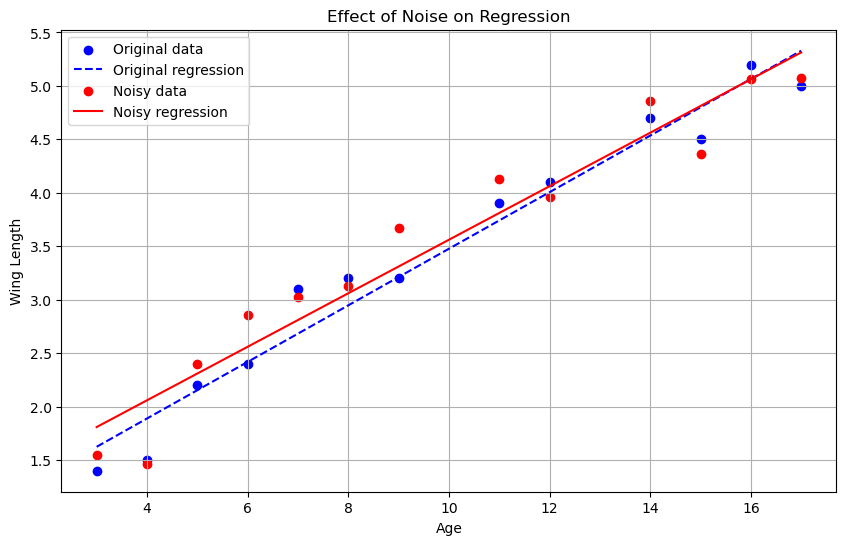

R^2 (Original): 0.96
R^2 (Noisy): 0.94


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Original data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]).reshape(-1, 1)
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add some noise to the wing_length data
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 0.3, size=wing_length.shape)  # Mean 0, standard deviation 0.3
wing_length_noisy = wing_length + noise

# Original regression model
model_original = LinearRegression()
model_original.fit(age, wing_length)
predicted_wing_length_original = model_original.predict(age)

# Regression with noisy data
model_noisy = LinearRegression()
model_noisy.fit(age, wing_length_noisy)
predicted_wing_length_noisy = model_noisy.predict(age)

# Plotting both original and noisy data with their regression lines
plt.figure(figsize=(10, 6))

# Plot original data and regression
plt.scatter(age, wing_length, color='blue', label='Original data')
plt.plot(age, predicted_wing_length_original, color='blue', linestyle='--', label='Original regression')

# Plot noisy data and regression
plt.scatter(age, wing_length_noisy, color='red', label='Noisy data')
plt.plot(age, predicted_wing_length_noisy, color='red', label='Noisy regression')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Effect of Noise on Regression')

# Show legend and grid
plt.legend()
plt.grid(True)
plt.show()

# Calculate R^2 for both original and noisy data
r_squared_original = r2_score(wing_length, predicted_wing_length_original)
r_squared_noisy = r2_score(wing_length_noisy, predicted_wing_length_noisy)

# Print R^2 values
print(f"R^2 (Original): {r_squared_original:.2f}")
print(f"R^2 (Noisy): {r_squared_noisy:.2f}")
